In [41]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import pandas as pd
import math

In [42]:
# We've loaded the modified csv file of Maharashtra which contains 2 columns - MU and period

# Change the file name to 'MPmodified.csv' or 'TNmodified.csv' to do auto regression for that particular state

newFile="Maharashtramodified.csv"
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
df1 = pd.read_csv(newFile)
df1.head()

,MU,period
0,120.0,2013/4/1
1,122.0,2013/4/2
2,113.7,2013/4/3
3,122.7,2013/4/4
4,122.2,2013/4/5


In [43]:
X = df1['MU']

In [44]:
# First 4 financial years(2013 April to 2017 March) into train data , Last year(2017 April to 2018 March) into Test data

#Check the row in the modified csv file for that particular state corresponding to 31-03-2017

train= X[0:1446]
test=X[1446:]

In [45]:
# Train the autoregression model using the inbuilt function AR() by passing the training dataset, and .fit() 
ARmodel = AR(train)
ARmodel_fit = ARmodel.fit()

#Get the window size and coefficients
windowsize = ARmodel_fit.k_ar
coefs = ARmodel_fit.params

In [46]:
print("Window size is :",windowsize)


print("Coefficients are: \n",coefs)



Window size is : 23
Coefficients are: 
 const     4.850502
L1.MU     0.987706
L2.MU    -0.087741
L3.MU    -0.006374
L4.MU    -0.028548
L5.MU     0.050868
L6.MU    -0.039899
L7.MU     0.121544
L8.MU    -0.057282
L9.MU     0.012781
L10.MU   -0.014466
L11.MU   -0.042304
L12.MU    0.078676
L13.MU   -0.046869
L14.MU    0.040011
L15.MU   -0.051009
L16.MU    0.004112
L17.MU    0.003602
L18.MU    0.019766
L19.MU   -0.021464
L20.MU   -0.000373
L21.MU    0.037655
L22.MU   -0.014533
L23.MU    0.011414
dtype: float64


In [49]:
# The predictions are made based on the previous 23 values since the window size is 23 in this case

# history is a list that stores all the lag variables 
# This contains the last 23 values of the training dataset initially .

history = train[len(train)-windowsize:]
history = list(history)
predictions = list()
test=list(test)

# We make a prediction for each of the test values

for t in range(len(test)):
    length = len(history)
    lag=list()
    
    # Necessary lag variables for the particular date are appended to the list lag
    
    for i in range(length-windowsize,length):
        lag.append(history[i])
        
     # The autoregression formula for yhat - we multiply each lag variable by it's corresponding coefficient and add them up
    
    yhat = coefs[0]
    for d in range(windowsize):
        yhat += coefs[d+1] * lag[windowsize-d-1]
    
    # The predicted values are appended to history since they will be needed for future predictions
    
    predictions.append(yhat)
    history.append(yhat)

# The root mean square error is obtained for the predicted and test values

error = math.sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)

Test MSE: 19.211


<Figure size 1600x1200 with 0 Axes>

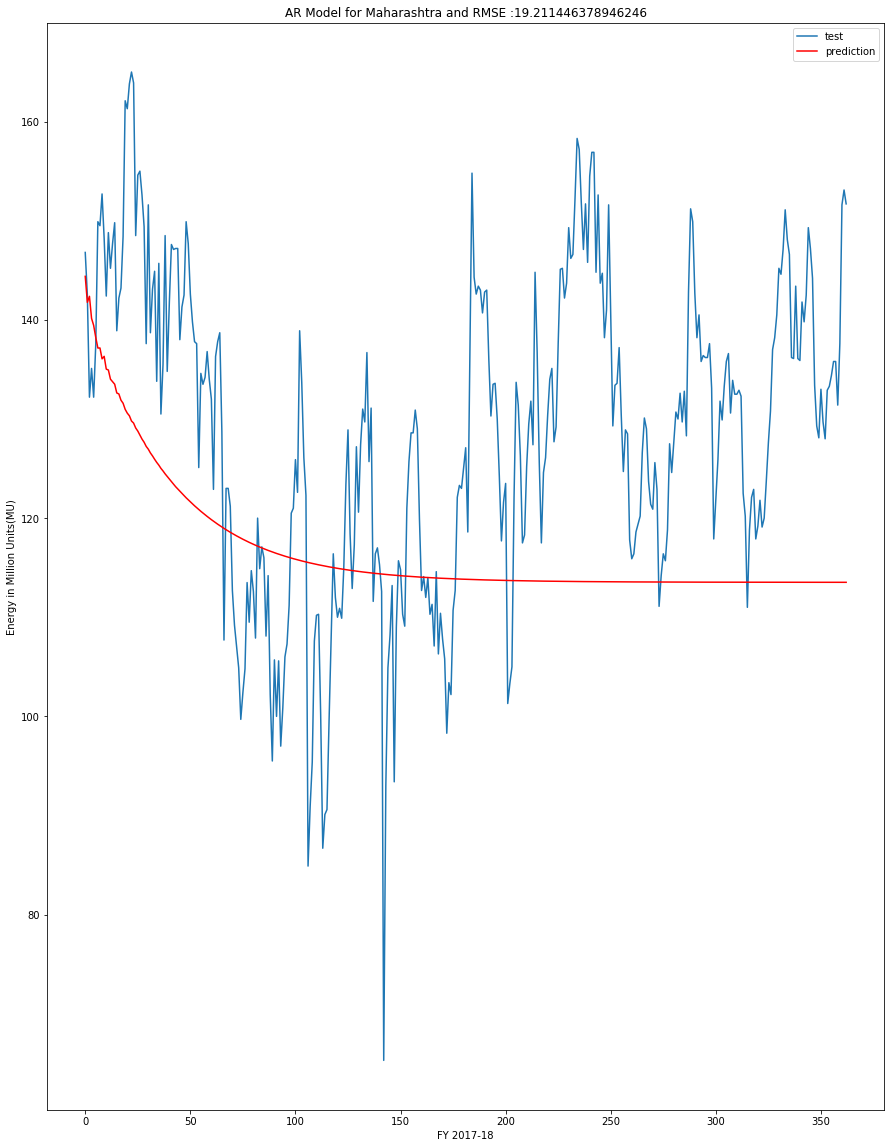

In [50]:
# Made a plot out of the test data and prediction data for the 2017-18 FY

figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
pyplot.figure(figsize=(15,20))
pyplot.plot(test,label='test')

pyplot.plot(predictions, color='red',label='prediction')
pyplot.legend()
pyplot.title("AR Model for Maharashtra and RMSE :"+ str(error))
pyplot.xlabel('FY 2017-18')
pyplot.ylabel('Energy in Million Units(MU)')
pyplot.show()